In [1]:
import os
os.chdir(r'/Users/rmccrickerd/desktop/jdheston')

In [2]:
import numpy as np
import pandas as pd
from jdheston import jdheston as jdh
from jdheston import utils as uts
from jdheston import config as cfg
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import gamma
# import mpl
# %matplotlib inline

In [3]:
nx = np.newaxis
cfg.config(scale=1.5,print_keys=False)

In [165]:
sigma = 0.1

In [170]:
T = np.array([1/52,1/12,3/12,6/12,1,2])[:,nx]
# M = ['1W','1M','3M','6M','9M','1Y']
Δ = np.linspace(5,95,19)[nx,:]/100
k = norm.ppf(Δ)*sigma*np.sqrt(T)

In [171]:
pd.DataFrame(k,index=T[:,0],columns=np.round(Δ[0,:],2))

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0.019231,-0.022810,-0.017772,-0.014373,-0.011671,-0.009353,-0.007272,-0.005343,-0.003513,-0.001743,0.0,0.001743,0.003513,0.005343,0.007272,0.009353,0.011671,0.014373,0.017772,0.022810
0.083333,-0.047483,-0.036995,-0.029919,-0.024296,-0.019471,-0.015138,-0.011123,-0.007314,-0.003628,0.0,0.003628,0.007314,0.011123,0.015138,0.019471,0.024296,0.029919,0.036995,0.047483
0.250000,-0.082243,-0.064078,-0.051822,-0.042081,-0.033724,-0.026220,-0.019266,-0.012667,-0.006283,0.0,0.006283,0.012667,0.019266,0.026220,0.033724,0.042081,0.051822,0.064078,0.082243
0.500000,-0.116309,-0.090619,-0.073287,-0.059512,-0.047694,-0.037081,-0.027246,-0.017914,-0.008886,0.0,0.008886,0.017914,0.027246,0.037081,0.047694,0.059512,0.073287,0.090619,0.116309
1.000000,-0.164485,-0.128155,-0.103643,-0.084162,-0.067449,-0.052440,-0.038532,-0.025335,-0.012566,0.0,0.012566,0.025335,0.038532,0.052440,0.067449,0.084162,0.103643,0.128155,0.164485
2.000000,-0.232617,-0.181239,-0.146574,-0.119023,-0.095387,-0.074161,-0.054493,-0.035829,-0.017771,0.0,0.017771,0.035829,0.054493,0.074161,0.095387,0.119023,0.146574,0.181239,0.232617


In [277]:
jump_weight = 0.25
jump_sigma = jump_weight**0.5*sigma
diff_sigma = (1 - jump_weight)**0.5*sigma
jump_sigma, diff_sigma

(0.0999499874937461, 0.0031622776601683807)

In [278]:
times1   = np.array([0,1/12,3/12,6/12])
sigma1   = np.array([ jump_sigma])*np.ones_like(times1)
rho1     = np.array([-0.7])*np.ones_like(times1)
vee1     = np.array([ 1])*np.ones_like(times1)
epsilon1 = np.array([ 0])*np.ones_like(times1)

In [279]:
times2   = np.array([0,1/12,3/12,6/12])
sigma2   = np.array([ diff_sigma])*np.ones_like(times2)
rho2     = np.array([+0.0])*np.ones_like(times2)
vee2     = np.array([ 1])*np.ones_like(times2)
epsilon2 = np.array([ 1])*np.ones_like(times2)

In [280]:
params1  = np.array([times1, sigma1, rho1, vee1, epsilon1]).T
params2  = np.array([times2, sigma2, rho2, vee2, epsilon2]).T

In [281]:
np.round(params1,2)

array([[ 0.  ,  0.1 , -0.7 ,  1.  ,  0.  ],
       [ 0.08,  0.1 , -0.7 ,  1.  ,  0.  ],
       [ 0.25,  0.1 , -0.7 ,  1.  ,  0.  ],
       [ 0.5 ,  0.1 , -0.7 ,  1.  ,  0.  ]])

In [282]:
np.round(params2,2)

array([[0.  , 0.  , 0.  , 1.  , 1.  ],
       [0.08, 0.  , 0.  , 1.  , 1.  ],
       [0.25, 0.  , 0.  , 1.  , 1.  ],
       [0.5 , 0.  , 0.  , 1.  , 1.  ]])

In [283]:
maturities = T
logstrikes = k

In [284]:
# call_prices = jdh.jdh_pricer(maturities, logstrikes, params1)
call_prices = jdh.jdh2f_pricer(maturities, logstrikes, [params1, params2])

In [285]:
implied_vols = jdh.surface(maturities, logstrikes, call_prices)

In [286]:
pd.DataFrame(implied_vols,index=T[:,0],columns=Δ[0,:])

,0.09892257737887705,0.12357554475688426,0.14678069258234377,0.1712605098837745,0.19875609380802955,0.23119150820998552,0.2713269290144764,0.32372699361281826,0.3965110803738783,0.5011284579457301,0.6331414963499459,0.7505614589892209,0.8275572748475546,0.8759500154315452,0.9087843015487315,0.9326181012231676,0.9508757789830455,0.9656350848782969,0.9785679419573543
0.019231,0.127070,0.110186,0.098192,0.088224,0.079298,0.070927,0.062812,0.054752,0.046655,0.038941,0.034512,0.036136,0.040349,0.045283,0.050608,0.056379,0.062855,0.070638,0.081529
0.083333,0.135091,0.120033,0.109317,0.100420,0.092477,0.085074,0.077973,0.071037,0.064223,0.057689,0.052097,0.048822,0.048567,0.050414,0.053426,0.057224,0.061805,0.067528,0.075710
0.250000,0.136246,0.123576,0.114583,0.107148,0.100550,0.094448,0.088649,0.083045,0.077584,0.072287,0.067293,0.062929,0.059701,0.058020,0.057886,0.059034,0.061273,0.064701,0.070181
0.500000,0.134276,0.123432,0.115770,0.109465,0.103898,0.098779,0.093943,0.089292,0.084770,0.080356,0.076077,0.072020,0.068365,0.065375,0.063323,0.062377,0.062588,0.064055,0.067392
1.000000,0.130473,0.121538,0.115267,0.110138,0.105637,0.101521,0.097653,0.093947,0.090349,0.086822,0.083348,0.079932,0.076603,0.073432,0.070542,0.068111,0.066361,0.065569,0.066298
2.000000,0.125494,0.118399,0.113459,0.109447,0.105946,0.102762,0.099783,0.096937,0.094177,0.091465,0.088773,0.086079,0.083367,0.080627,0.077863,0.075098,0.072397,0.069903,0.067979


In [287]:
# plt.rcParams['figure.figsize'] = [2*1.618*2,2*3]
# plt.rcParams['legend.loc'] = 'lower left'

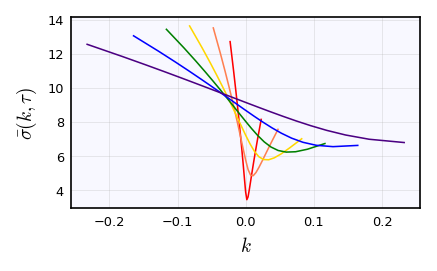

In [288]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*implied_vols[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
# plt.savefig('temp')

In [289]:
implied_vars = implied_vols*np.sqrt(T)
Δ = norm.cdf(k/implied_vars + 0.5*implied_vars)

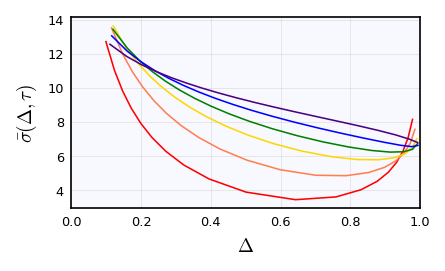

In [291]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(Δ[i,:],100*implied_vols[i,:])
    axes.set_xlabel(r'$\Delta$')
    axes.set_xlim([0,1])
    axes.set_ylabel(r'$\bar{\sigma}(\Delta,\tau)$')
# plt.savefig('temp')